## Clustering Travel Reviews

### Introduction

This project focuses on applying unsupervised machine learning techniques, specifically K-Means and Agglomerative Clustering, to analyze numerical travel review data from Southeast Asia. By grouping tourist locations in Southeast Asia based on user ratings across various categories such as art, dance, restaurants, museums, and beaches, we aim to uncover patterns in tourist preferences and the relative appeal of different locations.

### Data Set

The dataset from the UCI ML Repository contains numerical reviews of various tourist activities and locations in Southeast Asia. It includes user ratings on a 4-point scale across categories such as art, dance, juice, restaurants, museums, resorts, parks, beaches, theater, and religious sites. With 980 observations, the dataset offers insights into the appeal and user experience of these destinations, allowing for the analysis of trends and patterns in tourist preferences.

### Modeling Process

The modeling process involved applying unsupervised machine learning techniques, specifically K-Means and Agglomerative Clustering, to group tourist locations based on user ratings. Steps included data preprocessing, such as scaling and exploratory data analysis (EDA), to understand trends and distributions. Clustering models were then tuned using techniques like GridSearchCV to optimize parameters such as number of clusters and linkage methods. Evaluation metrics, including silhouette scores, were used to assess cluster quality. Principal Component Analysis (PCA) was employed to visualize the clusters and interpret relationships within the data.

### Importing Packages

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

### Loading Data

In [4]:
file = 'tripadvisor_review.csv'
df = pd.read_csv(file)
df.head()

,User ID,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
0,User 1,0.93,1.8,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
1,User 2,1.02,2.2,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
2,User 3,1.22,0.8,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
3,User 4,0.45,1.8,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86
4,User 5,0.51,1.2,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54


### Cleaning Data

#### Changing column names to be more descriptive

In [5]:
column_names = ['id', 'art', 'dance', 'juice', 'restaurants', 'museums', 'resorts', 'parks', 'beach', 'theater', 'religious']
df.columns = column_names
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           980 non-null    object 
 1   art          980 non-null    float64
 2   dance        980 non-null    float64
 3   juice        980 non-null    float64
 4   restaurants  980 non-null    float64
 5   museums      980 non-null    float64
 6   resorts      980 non-null    float64
 7   parks        980 non-null    float64
 8   beach        980 non-null    float64
 9   theater      980 non-null    float64
 10  religious    980 non-null    float64
dtypes: float64(10), object(1)
memory usage: 84.3+ KB


#### Removing 'id' column

Removing 'id' column as it's unnecessary for analysis

In [6]:
df = df.drop(columns = ['id'], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   art          980 non-null    float64
 1   dance        980 non-null    float64
 2   juice        980 non-null    float64
 3   restaurants  980 non-null    float64
 4   museums      980 non-null    float64
 5   resorts      980 non-null    float64
 6   parks        980 non-null    float64
 7   beach        980 non-null    float64
 8   theater      980 non-null    float64
 9   religious    980 non-null    float64
dtypes: float64(10)
memory usage: 76.7 KB


### Exploratory Data Analysis

#### Inspecting Statistical Values for Each Column

In [117]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
art,980.0,0.893194,0.326912,0.34,0.67,0.83,1.0200,3.22
dance,980.0,1.352612,0.478280,0.00,1.08,1.28,1.5600,3.64
juice,980.0,1.013306,0.788607,0.13,0.27,0.82,1.5725,3.62
restaurants,980.0,0.532500,0.279731,0.15,0.41,0.50,0.5800,3.44
museums,980.0,0.939735,0.437430,0.06,0.64,0.90,1.2000,3.30
resorts,980.0,1.842898,0.539538,0.14,1.46,1.80,2.2000,3.76
parks,980.0,3.180939,0.007824,3.16,3.18,3.18,3.1800,3.21
beach,980.0,2.835061,0.137505,2.42,2.74,2.82,2.9100,3.39
theater,980.0,1.569439,0.364629,0.74,1.31,1.54,1.7600,3.17
religious,980.0,2.799224,0.321380,2.14,2.54,2.78,3.0400,3.66


#### Plotting Distribution of All Columns

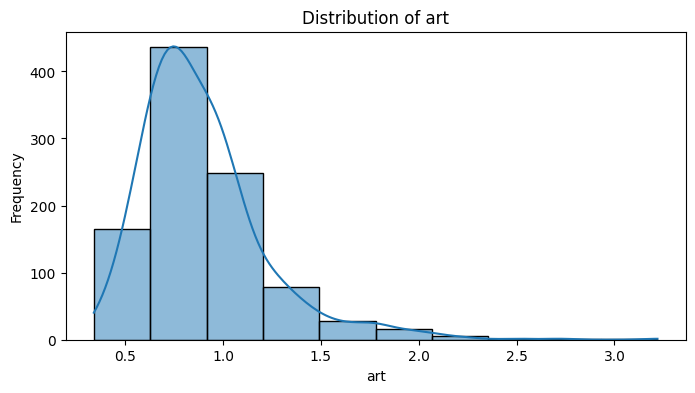

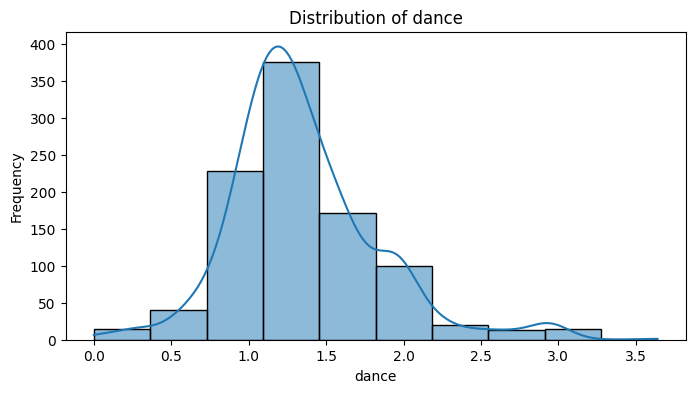

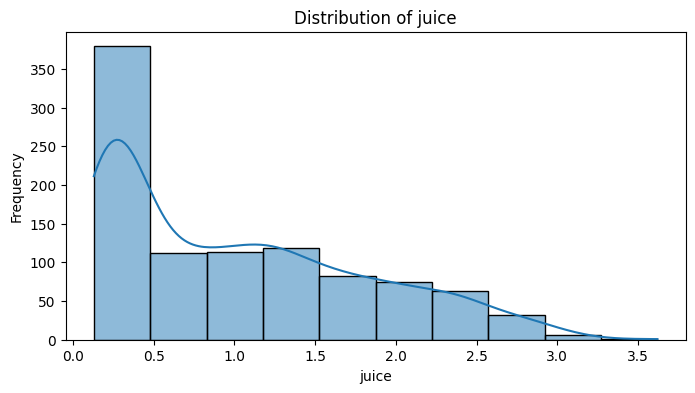

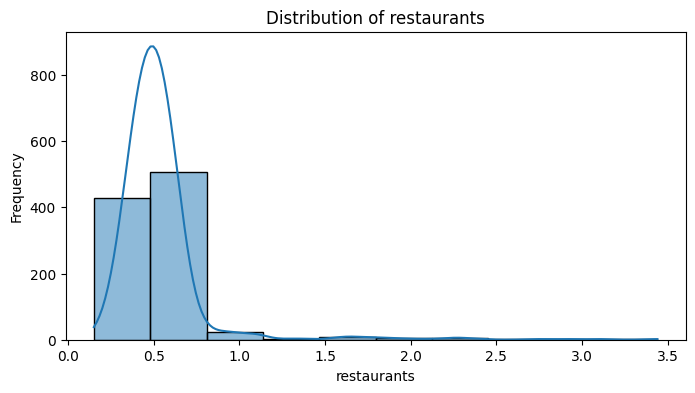

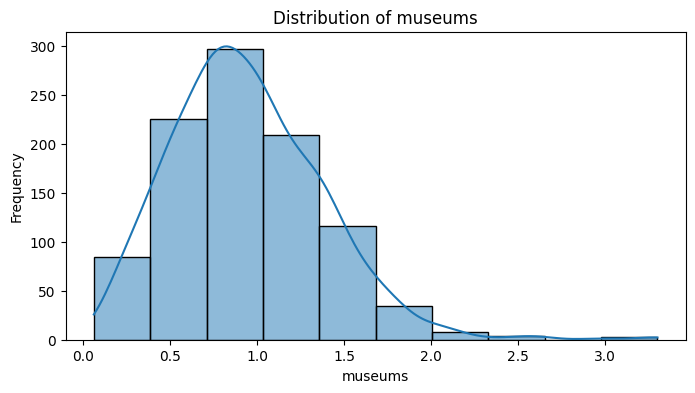

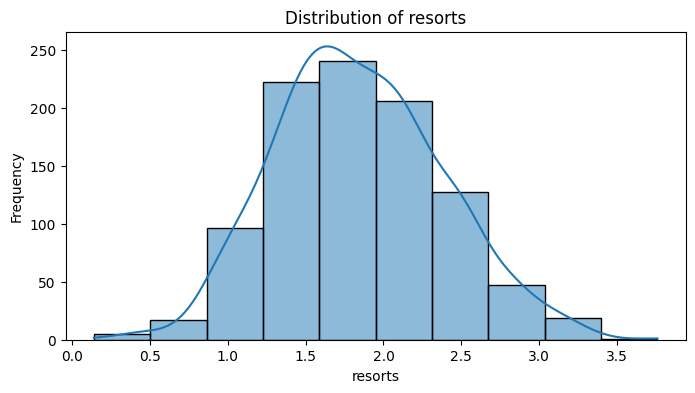

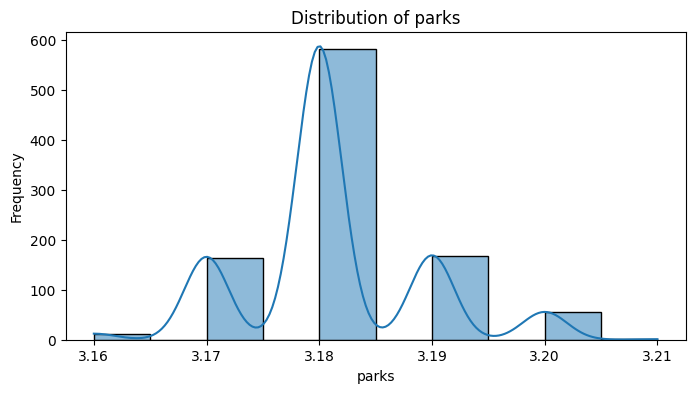

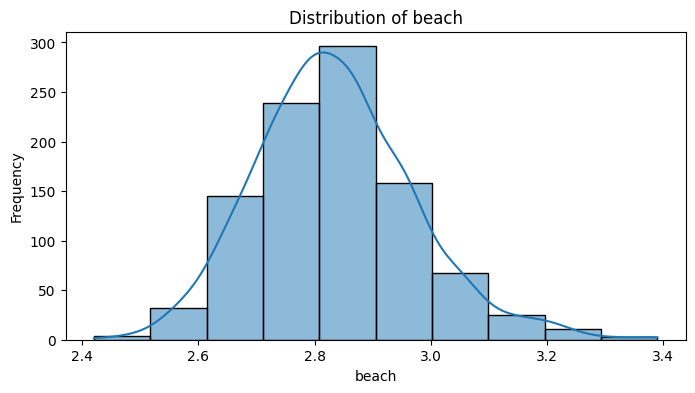

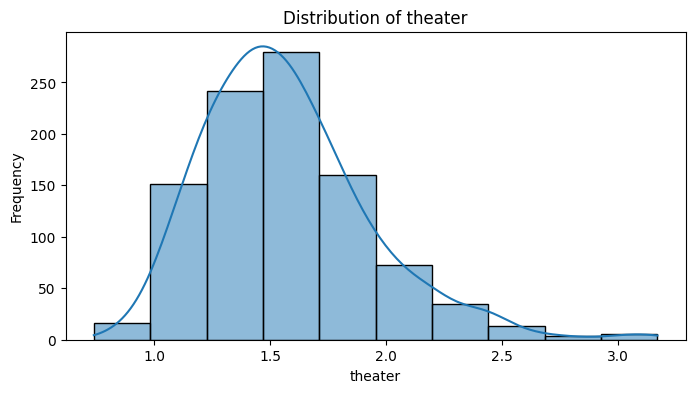

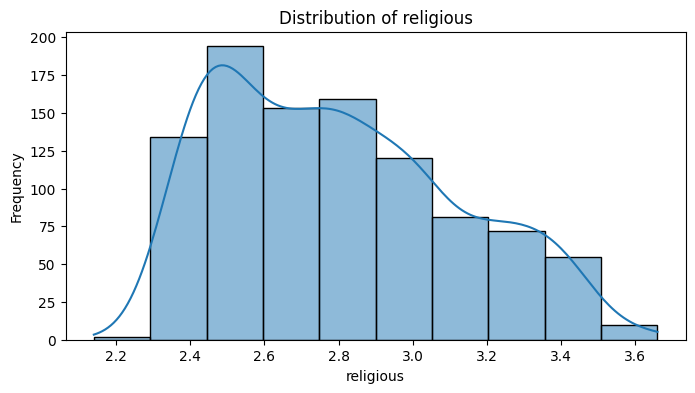

In [119]:
for col in df.columns:
    plt.figure(figsize = (8, 4))
    sns.histplot(df[col], bins = 10, kde = True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

### EDA Discussion

Exploratory Data Analysis (EDA) focused on understanding the distribution and variability of user ratings across categories such as art, dance, restaurants, and beaches. Summary statistics revealed the mean, standard deviation, and ranges for each category, highlighting areas of high and low user satisfaction. Density plots identified right-skewed distributions in categories like art and museums, indicating most ratings were low with occasional higher scores. In contrast, parks and beaches had relatively uniform distributions, suggesting consistent user satisfaction. These insights helped identify patterns and informed the clustering process.

### K-Means Clustering

#### Generating Elbow Plot

Generating elbow plot to find optimal number of clusters

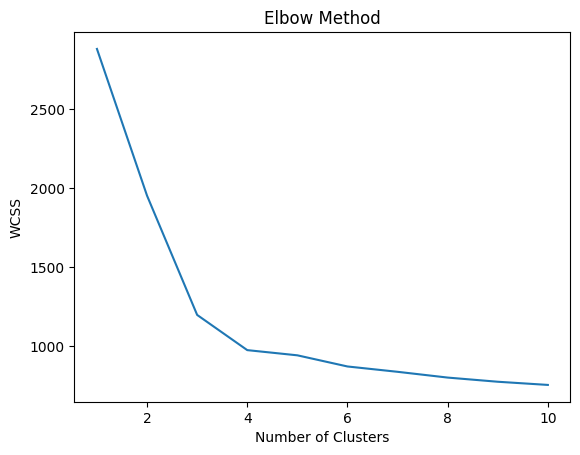

In [13]:
# Elbow Method to find optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=100)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

# Plotting the elbow graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Fit KMeans with optimal number of clusters
optimal_clusters = 4  # Adjust based on the elbow method
kmeans = KMeans(n_clusters=optimal_clusters, random_state=100)
df['Cluster'] = kmeans.fit_predict(df)

#### Using GridSearchCV for Hyperparameter Tuning

##### Creating a Function for GridSearchCV to utilize silhouette score for performance metrics

In [120]:
def silhouette_scorer(estimator, x):
    labels = estimator.fit_predict(x)
    return silhouette_score(x, labels)

##### Defining K-Means Grid Parameters to be Tested and Running GridSearchCV

In [19]:
km_param_grid = {
    'n_clusters': range(2, 11),
    'init': ['k-means++', 'random'],
    'max_iter': [100, 200, 300, 500],
    'n_init': [10, 20, 30],
    'algorithm': ['lloyd', 'elkan']
}

In [20]:
km_grid = GridSearchCV(
    KMeans(random_state = 100),
    param_grid = km_param_grid,
    cv = 5,
    scoring = silhouette_scorer
)

In [21]:
km_grid.fit(df)

GridSearchCV(cv=5, estimator=KMeans(random_state=100),
             param_grid={'algorithm': ['lloyd', 'elkan'],
                         'init': ['k-means++', 'random'],
                         'max_iter': [100, 200, 300, 500],
                         'n_clusters': range(2, 11), 'n_init': [10, 20, 30]},
             scoring=<function silhouette_scorer at 0x0000027864F8E0C0>)

In [23]:
print(f'KMeans Best Parameters: {km_grid.best_params_}')
print(f'Kmeans Best Silhouette Score: {km_grid.best_score_}')

KMeans Best Parameters: {'algorithm': 'lloyd', 'init': 'k-means++', 'max_iter': 100, 'n_clusters': 2, 'n_init': 10}
Kmeans Best Silhouette Score: 0.4200028553884473


#### Creating a Model with the Best Parameters

In [121]:
km_best_params = km_grid.best_params_
km_best = KMeans(random_state = 100,
                 algorithm = 'lloyd',
                 init = 'k-means++',
                 max_iter = 100,
                 n_clusters = 2,
                 n_init = 10)
km_results = df.copy()
km_results['cluster'] = km_best.fit_predict(df)
km_silhouette_avg = silhouette_score(df, km_results['cluster'])
km_silhouette_avg

0.30085279300986595

A silhouette score of about 0.3 indicates that there is some separation between the two clusters but they probably are not as tightly packed.

In [125]:
km_results['cluster'].value_counts()

cluster
1    598
0    382
Name: count, dtype: int64

#### Visualizing K-Means Clustering Results

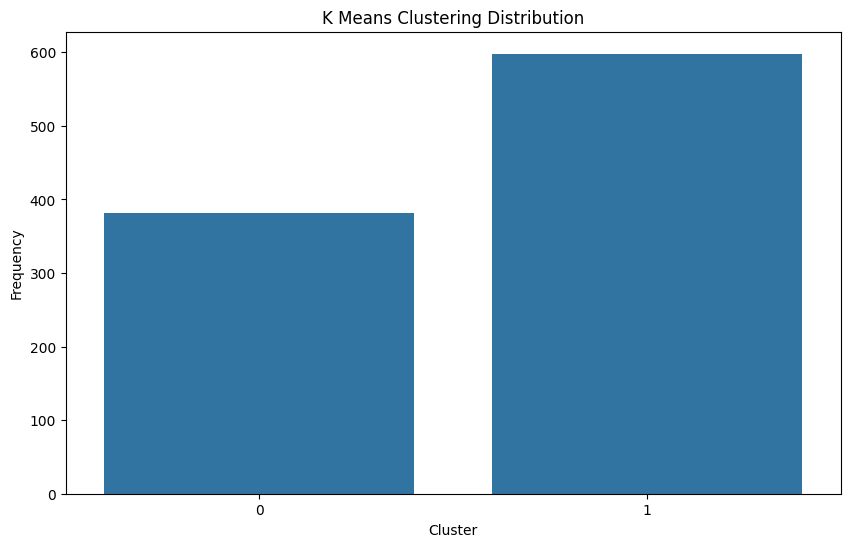

Average Ratings per Cluster:
cluster             0         1
art          0.905995  0.885017
dance        1.419476  1.309900
juice        1.829398  0.491990
restaurants  0.582801  0.500368
museums      1.180000  0.786254
resorts      2.183560  1.625284
parks        3.187147  3.176973
beach        2.804895  2.854331
theater      1.526099  1.597124
religious    2.601571  2.925485


In [114]:
plt.figure(figsize=(10, 6))
sns.countplot(data = km_results, x='cluster')
plt.title('K-Means Clustering Distribution')
plt.xlabel('Cluster')
plt.ylabel('Frequency')
plt.show()

km_cluster_analysis = km_results.groupby('cluster').mean().T
print("Average Ratings per Cluster:")
print(km_cluster_analysis)

#### Visualizing Clusters with PCA

In [122]:
km_pca = PCA(n_components=2)
km_pca_results = km_pca.fit_transform(km_results)

km_pca_df = pd.DataFrame(data = km_pca_results, columns=['PC1', 'PC2'])
km_pca_df['cluster'] = km_results['cluster']

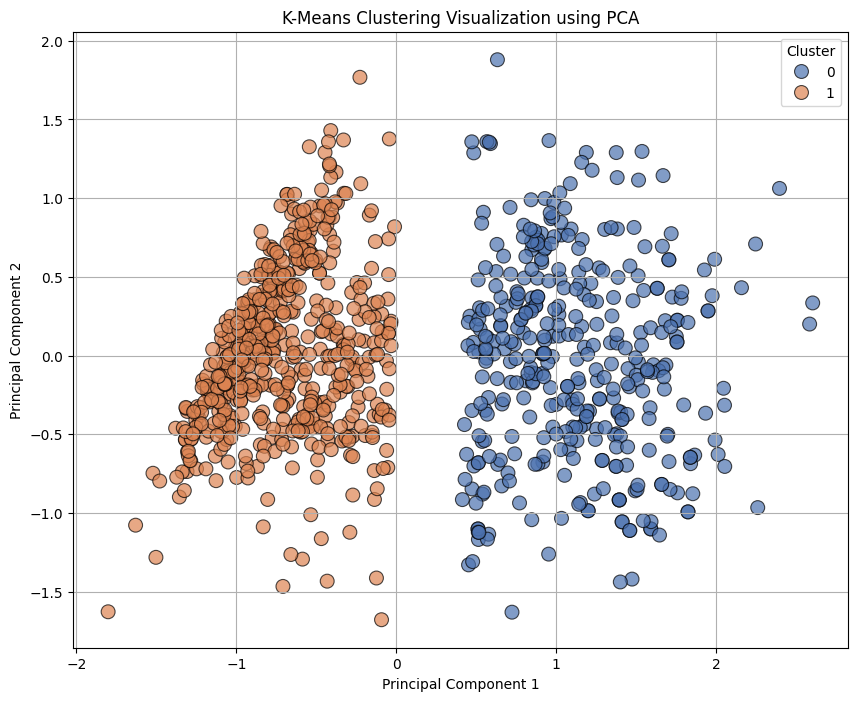

In [124]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data = km_pca_df, x='PC1', y='PC2', hue='cluster', palette='deep', s=100, alpha=0.7, edgecolor='k')
plt.title('K-Means Clustering Visualization using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

### Agglomerative Clustering

#### Using GridSearchCV for Hyperparameter Tuning

##### Defining Grid Parameters and Using GridSearchCV

In [90]:
ag_param_grid = {
    'n_clusters': range(2, 11),
    'linkage': ['ward', 'complete', 'average', 'single']
}

In [92]:
ag_grid = GridSearchCV(
    AgglomerativeClustering(),
    param_grid = ag_param_grid,
    scoring = silhouette_scorer,
    cv = 5)

In [93]:
ag_grid.fit(df)

GridSearchCV(cv=5, estimator=AgglomerativeClustering(),
             param_grid={'linkage': ['ward', 'complete', 'average', 'single'],
                         'n_clusters': range(2, 11)},
             scoring=<function silhouette_scorer at 0x0000027864F8E0C0>)

In [95]:
print(f'Agglomerative Best Parameters: {ag_grid.best_params_}')
print(f'Agglomerative Best Silhouette Score: {ag_grid.best_score_}')

Agglomerative Best Parameters: {'linkage': 'average', 'n_clusters': 2}
Agglomerative Best Silhouette Score: 0.36370780634710737


#### Agglomerative Clustering with Best Parameters

In [99]:
ag_best_params = ag_grid.best_params_
ag_best = AgglomerativeClustering(linkage = 'average',
                                  n_clusters = 2)
ag_results = df.copy()
ag_results['cluster'] = ag_best.fit_predict(df)
silhouette_avg = silhouette_score(df, ag_results['cluster'])
silhouette_avg

0.41066869525048516

In [105]:
ag_results['cluster'].value_counts()

cluster
0    979
1      1
Name: count, dtype: int64

This silhouette score of about 0.41 outperforms the K-Means Clustering model. However, the distribution between predicted clusters is quite strange, as cluster 1 has only one data point and everything else is in cluster 0.

#### Visualizing Agglomerative Clustering

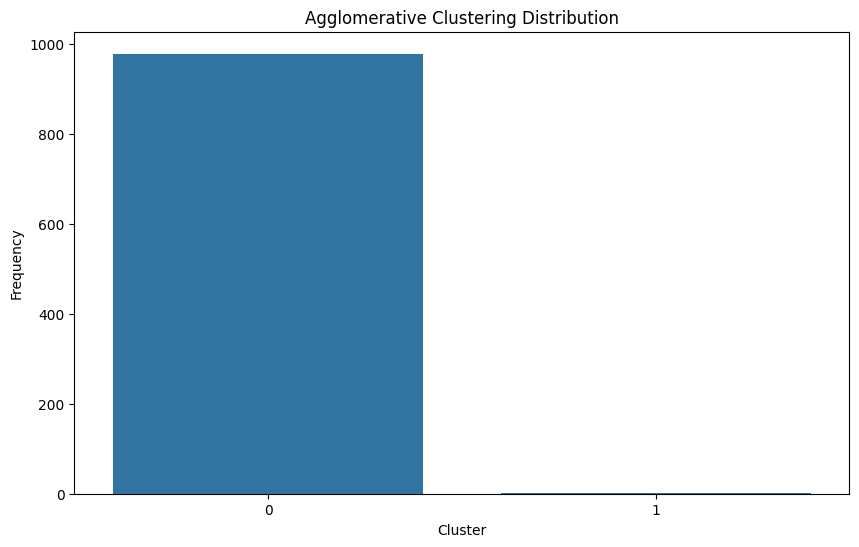

Average Ratings per Cluster (Agglomerative):
cluster             0     1
art          0.893391  0.70
dance        1.352155  1.80
juice        1.010644  3.62
restaurants  0.531645  1.37
museums      0.939203  1.46
resorts      1.843126  1.62
parks        3.180930  3.19
beach        2.835148  2.75
theater      1.569898  1.12
religious    2.798590  3.42


In [115]:
plt.figure(figsize=(10, 6))
sns.countplot(data = ag_results, x='cluster')
plt.title('Agglomerative Clustering Distribution')
plt.xlabel('Cluster')
plt.ylabel('Frequency')
plt.show()

# Analyze average ratings per cluster
ag_cluster_analysis = ag_results.groupby('cluster').mean().T
print("Average Ratings per Cluster (Agglomerative):")
print(ag_cluster_analysis)

#### Visualizing Agglomerative Clustering Results with PCA

In [126]:
ag_pca = PCA(n_components=2)
ag_pca_results = ag_pca.fit_transform(ag_results)

ag_pca_df = pd.DataFrame(data = ag_pca_results, columns=['PC1', 'PC2'])
ag_pca_df['cluster'] = ag_results['cluster']

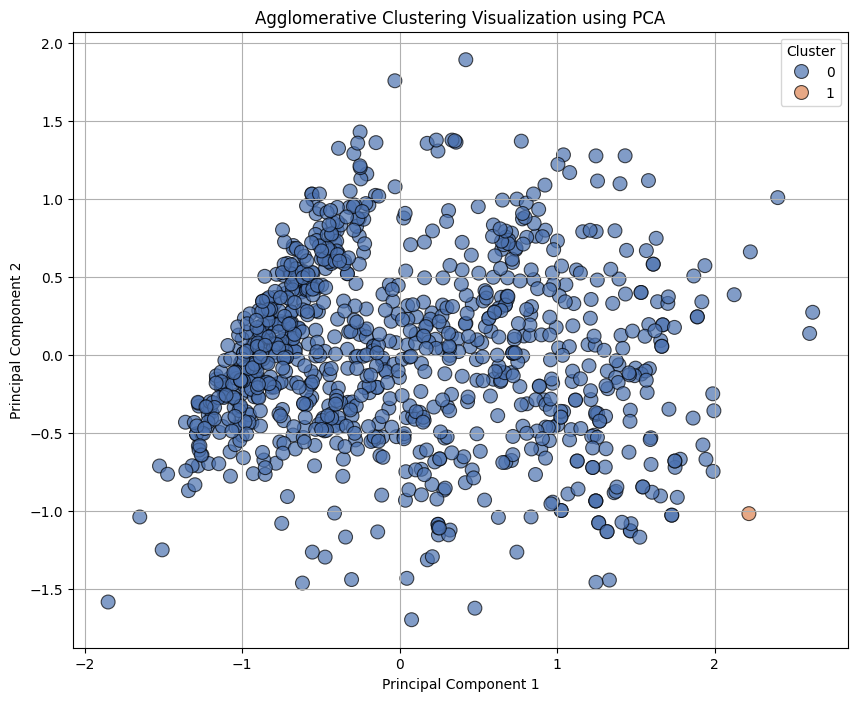

In [127]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data = ag_pca_df, x='PC1', y='PC2', hue='cluster', palette='deep', s=100, alpha=0.7, edgecolor='k')
plt.title('Agglomerative Clustering Visualization using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

### Discussion of Results and Limitations

K-Means clustering grouped the tourist locations into two clusters based on user ratings. One cluster featured locations with generally higher ratings across categories, while the other had lower-rated locations. The silhouette score of 0.3 indicated moderate separation between the clusters. Average ratings for activities like parks, beaches, and religious sites were consistently high across clusters, while other categories such as juice, museums, and resorts showed more pronounced differences, reflecting varying user experiences.

Agglomerative Clustering produced two clusters, but with a great imbalance. One cluster contained nearly all data points, while the other had only one. Despite this, the silhouette score of 0.4 suggested slightly better-defined clusters compared to K-Means. The results highlighted limitations in the method’s effectiveness for this dataset, particularly due to the imbalance and lack of significant distinctions in ratings across clusters. This outcome underscores the need for careful parameter tuning or alternative approaches for clustering in such datasets.

Limitations of this project included imbalanced clusters for Agglomerative Clustering and moderate silhouette scores for both methods. This indicates that separation was not optimal. Some categories had right skewed distributions further showing imbalances that affect clustering. This model could be improved by applying normalization techniques to address the imbalances or using other clustering methods like DBSCAN.